## a-AlphaBio homework 
### Run inference with some of the trained models
### Mark Thompson
### Started April 29, 2024 

In [1]:
%load_ext autoreload

In [2]:
%autoreload
# import libraries
import numpy as np
import pickle as pk
import pandas as pd
import math
import os
import matplotlib.pyplot as plt
%matplotlib inline

---------
### Holdout dataset

In [3]:
# The holdout data
data_file = '../data/alphaseq_data_hold_out.csv'
df = pd.read_csv(data_file)
rows1 = df.shape[0]
print('holdout dataframe has', rows1, 'rows')
print(df.columns.tolist())
print(df['sequence_a'].describe())

holdout dataframe has 30071 rows
['description_a', 'sequence_a', 'description_alpha', 'sequence_alpha']
count                                                 30071
unique                                                29971
top       QVQLVQSGVEVKKPGASVKVSCKASGYTFTNYYMYWVRQAPGQGLE...
freq                                                    101
Name: sequence_a, dtype: object


In [4]:
# Some plotting functions
#
def plot_preds_hist(preds_file_path):
    preds = pk.load(open(preds_file_path, 'rb'))
    print('len(preds):', len(preds))
    preds = [p[0] for p in preds]
    print('preds[0:10]:', preds[0:10])

    # Histogram of predicted values
    plt.hist(preds, bins=100)
    plt.xlabel('pred Kd (nm)')
    plt.ylabel('count')
    plt.title('Distribution of pred values on holdout set')
    plt.show()

def plot_pred_vs_true(preds_file_path, true_file_path, xlim=(0,5), ylim=(0,5)):
    preds = pk.load(open(preds_file_path, 'rb'))
    y = pk.load(open(true_file_path, 'rb'))
    print('len(preds):', len(preds), ', len(y):', len(y))
    preds = [p[0] for p in preds]
    print('preds[0:10]:', preds[0:10])

    # Calc the root mean squared error
    rmse = math.sqrt(np.mean((np.array(y) - np.array(preds))**2))
    print('rmse:', rmse)

    # scatter plot of true vs pred
    plt.scatter(y, preds, c ="blue")
    plt.xlabel('experimental Kd (nm)')
    plt.ylabel('predicted Kd (nm)')
    plt.title('true vs predicted Kd on validation set')
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.show()


----
### MLP model

In [ ]:
pred_file_path = '../inference_results/preds_mlp.pkl'
plot_preds_hist(pred_file_path)

In [ ]:
pred_file_path = '../inference_results/preds_mlp_1714519460.345232.pkl'
true_file_path = '../inference_results/y_mlp_1714519460.3456798.pkl'
plot_pred_vs_true(pred_file_path, true_file_path)

----
### Dense MLP model

In [ ]:
pred_file_path = '../inference_results/preds_dense_mlp.pkl'
plot_preds_hist(pred_file_path)

In [ ]:
# Inference on the validation set to compare actual with predicted values
pred_file_path = '../inference_results/preds_dense_mlp_1714520055.8448465.pkl'
true_file_path = '../inference_results/y_dense_mlp_1714520055.845317.pkl'
plot_pred_vs_true(pred_file_path, true_file_path)

----
### Residual MLP

In [ ]:
pred_file_path = '../inference_results/preds_residual_mlp_1714622884.672657.pkl'
plot_preds_hist(pred_file_path)

In [ ]:
# Inference on the validation set to compare actual with predicted values
pred_file_path = '../inference_results/preds_residual_mlp_1714622963.854741.pkl'
true_file_path = '../inference_results/y_residual_mlp_1714622963.855089.pkl'
plot_pred_vs_true(pred_file_path, true_file_path)

-------
### Vision Transform Model (VIT)

In [ ]:
pred_file_path = '../inference_results/preds_vit_1714621857.9278982.pkl'
plot_preds_hist(pred_file_path)

In [ ]:
# Inference on the validation set to compare actual with predicted values
pred_file_path = '../inference_results/preds_vit_1714622048.243739.pkl'
true_file_path = '../inference_results/y_vit_1714622048.2449658.pkl'
plot_pred_vs_true(pred_file_path, true_file_path)

-------
### Vision Transform Model (VIT)  Clean-2 Dataset

In [ ]:
pred_file_path = '../inference_results/vit/cleaned-2/preds_vit_1714662361.943635.pkl'
plot_preds_hist(pred_file_path)

In [ ]:
# Inference on the validation set to compare actual with predicted values
pred_file_path = '../inference_results/vit/cleaned-2/preds_vit_1714662684.9658298.pkl'
true_file_path = '../inference_results/vit/cleaned-2/y_vit_1714662684.967206.pkl'
plot_pred_vs_true(pred_file_path, true_file_path, xlim=(0,4), ylim=(0,4))

----
### BERT
Unfreeze last 3 layers of transformer


In [ ]:
pred_file_path = '''
plot_preds_hist(pred_file_path)

len(preds): 925 , len(y): 925
preds[0:10]: [2.9546661376953125, 2.9229674339294434, 3.022197961807251, 2.6244325637817383, 1.071242094039917, 2.6415395736694336, 2.5408101081848145, 1.912604570388794, 1.9393844604492188, 2.5319058895111084]
rmse: 1.0552541963790436


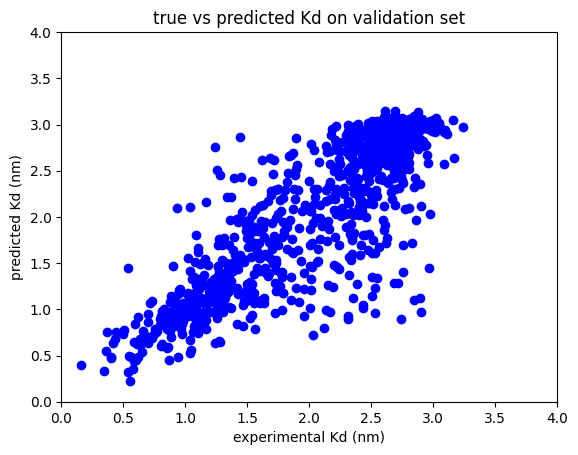

In [5]:
# Inference on the validation set to compare actual with predicted values
pred_file_path = '../inference_results/bert/clean_3_dataset/unfreeze_last_3_layers/preds_bert_1714674435.8165665.pkl'
true_file_path = '../inference_results/bert/clean_3_dataset/unfreeze_last_3_layers/y_bert_1714674435.8167834.pkl'
plot_pred_vs_true(pred_file_path, true_file_path, xlim=(0,4), ylim=(0,4))

----
### BERT
All layers of transformer are frozen


len(preds): 925 , len(y): 925
preds[0:10]: [2.9546661376953125, 2.9229674339294434, 3.022197961807251, 2.6244325637817383, 1.071242094039917, 2.6415395736694336, 2.5408101081848145, 1.912604570388794, 1.9393844604492188, 2.5319058895111084]
rmse: 1.0552541963790436


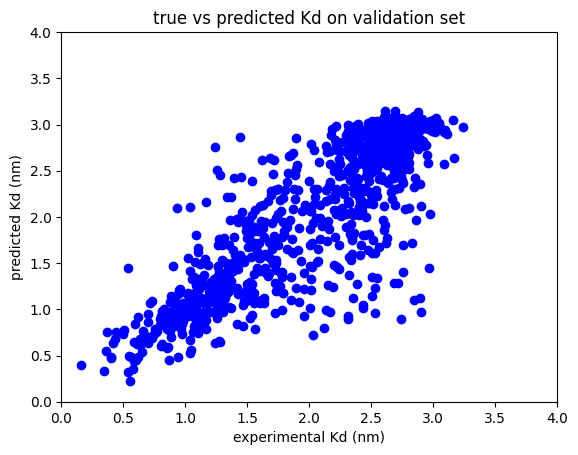

In [6]:
# Inference on the validation set to compare actual with predicted values
pred_file_path = '../inference_results/bert/clean_3_dataset/unfreeze_last_0_layers/preds_bert_1714675343.229837.pkl'
true_file_path = '../inference_results/bert/clean_3_dataset/unfreeze_last_0_layers/y_bert_1714675343.2300615.pkl'
plot_pred_vs_true(pred_file_path, true_file_path, xlim=(0,4), ylim=(0,4))